#    Qiskit  
 Quantum Information Software Kit
 
----------------

Qiskit is, python-based, open-source software development kit for working with **Quantum Computers** at the level of circuits, pulses, and algorithms.   
  
Qiskit provides the ability to develop and execute quantum softwares  
* on real quantum computer, at machine code level of **OpenQASM**, as well as
* on local computer, using **simulators**. 

Qiskit was founded by **IBM Research** to allow software development for their cloud quantum computing service, IBM Quantum Experience.

**Components of Qiskit**
* Qiskit Terra - element Terra provides tools to create quantum circuits at or close to the level of quantum machine code.
* Qiskit Aer - element Aer provides high-performance quantum computing simulators with realistic noise models.
* Qiskit Ignis - element Ignis provides tools for quantum hardware verification, noise characterization, and error correction.


**Various Domain-Specific qiskit packages/framework**  
* Qiskit Optimization - covers the whole range from high-level modeling of optimization problems.
* Qiskit Finance
* Qiskit Machine Learning - contains sample datasets, some classification algorithms(Q-SVM, VQC), etc.
* Qiskit Nature

------------------------------------

Installation

In [2]:
# !pip install qiskit[visualization]

You should consider upgrading via the 'c:\users\ashok\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



Processing c:\users\ashok\appdata\local\pip\cache\wheels\34\31\15\7b070b25d0a549d20ce2e9fe6d727471c2c61ef904720fd40c\python_constraint-1.4.0-py2.py3-none-any.whl
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached dlx-1.0.4.tar.gz (5.5 kB)
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Using cached ntlm_auth-1.5.0-py2.py3-none-any.whl (29 kB)
  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
  Created wheel for qiskit: filename=qiskit-0.30.1-py3-none-any.whl size=11684 sha256=0c9b04dbbd2d9476b9fa440359f0a4fae60c77fed975613445b6b85fc92f2e0e
  Stored in directory: c:\users\ashok\appdata\local\pip\cache\wheels\34\8b\a1\0a9c3920111456bd0e203e46102b44c7924cd8cd2fb1be95cd
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136823 sha256=aa42bde7b5a59465aaa93287979db9e68f06baab1f2a5ed70f43a71129b5a13e
  Stored in directory: c:\users\ashok\appdata\local\pip\cache\wheels\a3\68\6

  Stored in directory: c:\users\ashok\appdata\local\pip\cache\wheels\a6\54\b8\97d38dd12a97871952801b9c24480bf0701ab5034ea816d80b
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=f28db01ada25119edfe9ec2ee10ce65436ea8abe8a69e904a2e30ba146c083f4
  Stored in directory: c:\users\ashok\appdata\local\pip\cache\wheels\1d\13\0b\0c32509050dcd9264e9a90b1d9d2dc9c6db9538db151ea7d26
Successfully built qiskit pylatexenc dlx fastdtw yfinance docplex multitasking


### Building a Quantum circuit

* Importing packages

In [15]:
from qiskit import QuantumCircuit, assemble, Aer   ##contains set of quantum instructions
from qiskit import transpile ## used for translating to QASM
from qiskit.providers.aer import QasmSimulator   ##quantum circuit simulator
from qiskit.visualization import plot_histogram

* Circuit Initialization

In [8]:
circuit = QuantumCircuit(2, 2)   ## a circuit with 2 qubits and 2 classical bits, all initialized to zero state.

* Adding quantum gates

In [9]:
circuit.h(0) ## A Hadamard gate (H) added on 0th qubit
circuit.cx(0, 1) ## A controlled-Not gate (CNOT) on control qubit 0 and target qubit 1

circuit.measure([0,1], [0,1]) ## the signals from qubits are measured using classical bits

* Visualize the circuit

In [10]:
circuit.draw()  ## text-based visualization

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

* Circuit compilation (for a simulator)

In [14]:
simulator = QasmSimulator() ## Aer's qasm_simulator
compiled_circuit = transpile(circuit, simulator)  ## compile the circuit down to low-level QASM instructions

* Simulating the experiment

In [18]:
job = simulator.run(compiled_circuit, shots=1000)  ## Execute the circuit on the qasm simulator
result = job.result()  # Grab results from the job
counts = result.get_counts(compiled_circuit)  ## get counts of the outputs

print("\nCount of the results",counts)
bb


Count of the outputs {'11': 509, '00': 491}


* Visualize the result

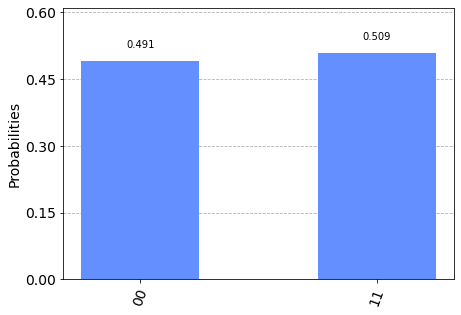

In [19]:
plot_histogram(counts)

* Inference  
  
 The Hadamard gate H on qubit 0, which puts it into a superposition state.  
    $|q_0⟩ = \frac{|0⟩}{\sqrt2} + \frac{|1⟩}{\sqrt2}$  
 
 The controlled-Not operation (CNOT) on control qubit 0 and target qubit 1, puts the 2 qubits in an entangled state.  
   $|\psi⟩ = \frac{|00⟩ + |11⟩}{\sqrt2}$  
   
 This state is known as the **bell state**.

##### Basic Qiskit Workflow:  
* **Build**: Design a quantum circuit(s) that represents the problem you are considering.
* **Compile**: Compile circuits for a specific quantum service, e.g. a quantum system or classical simulator.
* **Run**: Run the compiled circuits on the specified quantum service(s). These services can be cloud-based or local.
* **Analyze**: Compute summary statistics and visualize the results of the experiments.

In [58]:
## circuit building
def newCircuit():
    '''returns a simple default circuit for reusabilty'''
    qc = QuantumCircuit(3)  ## Create a Quantum Circuit acting on a quantum register of three qubits
    # Add a H gate on qubit 0, putting this qubit in superposition.
    qc.h(0)

    # Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting the qubits in a Bell state.
    qc.cx(0, 1)

    # Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting the qubits in a GHZ state.
    qc.cx(0, 2)
    
    return qc

### Visualization Techniques

###### Visulize the circuit
 The qubits are put from top to bottom.   
 The gates that are applied appears from left to right in the circuit.



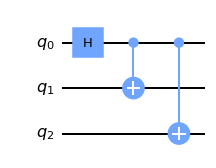

In [64]:
qc=newCircuit()
qc.draw('mpl')  ## matplotlib as backend for visualizing

In [65]:
## Aer_simulator
sim = Aer.get_backend('aer_simulator')  # simulator 

qc.save_statevector()
qobj = assemble(qc) ## compile the circuit down to low-level QASM instructions
result = sim.run(qobj).result()
state = result.get_statevector()


###### Visualizing Quantum State  
Quantum State Vector is a complex vector of dimensions $2^n$, where $n$ is the number of qubits in register.

In [66]:
#Statevector of the above system of 3 qubits
from qiskit.visualization import array_to_latex
display(array_to_latex(state, prefix="\\text{Out State} = "))

<IPython.core.display.Latex object>

-> $ \frac{|000⟩ + |111⟩}{\sqrt2}$

c:\users\ashok\appdata\local\programs\python\python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


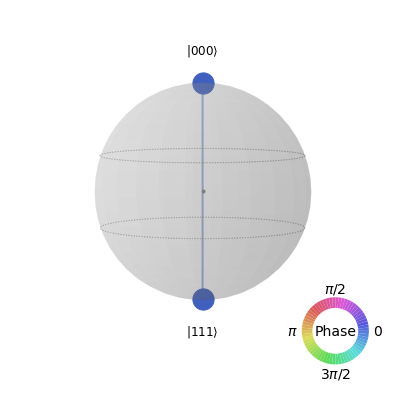

In [11]:
# Q-sphere
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(state)

###### State Vector SImulator

In [76]:

## get a new circuit
qc=newCircuit()
display(qc.draw())
# get the backend
backend = Aer.get_backend('statevector_simulator')

# Run the quantum circuit on a statevector simulator backend, without compiling into QASM
job = backend.run(qc)

result = job.result()

state = result.get_statevector(qc, decimals=3)
print(state)

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


##### Q-State visualization

In [78]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_bloch_vector

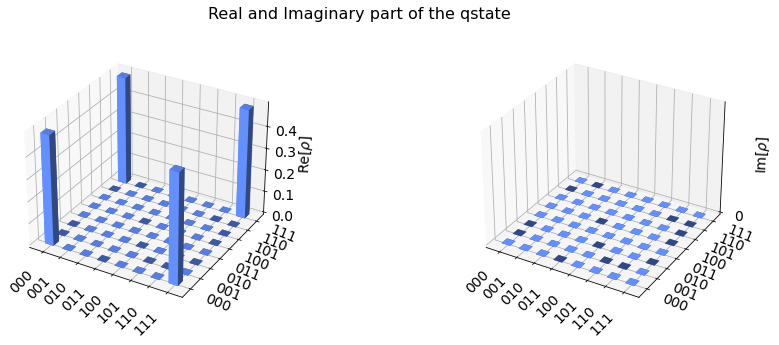

In [79]:
## city-visualization
plot_state_city(state, title='Real and Imaginary part of the qstate')

##### Bloch Spheres

c:\users\ashok\appdata\local\programs\python\python39\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
c:\users\ashok\appdata\local\programs\python\python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


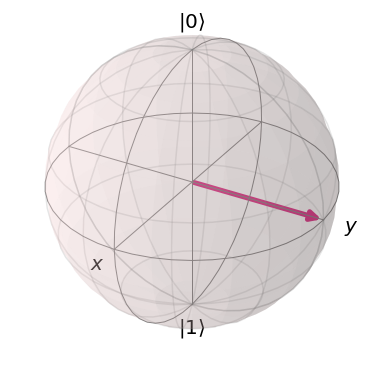

In [80]:
## bloch-vector in a bloch-sphere.
plot_bloch_vector([0,1,0])

c:\users\ashok\appdata\local\programs\python\python39\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


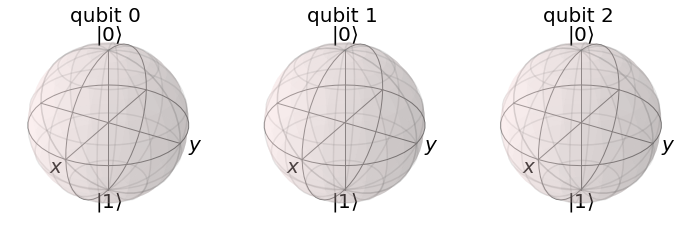

In [81]:
## bloch-sphere
plot_bloch_multivector(state)

###### Unitary representation of the circuit
We convert the whole circuit into a unitary operator, which can be reused to perform this operation on other circuit.  
Requires $2^n×2^n$ matrix for representing the quantum circuit.

In [69]:
## new circuit
qc=newCircuit()
display(qc.draw())

qc.save_unitary()  ## saving the overall operation, not the state 
qobj = assemble(qc)
unitary = sim.run(qobj).result().get_unitary()

## displaying the vector representation of the circuit
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

<IPython.core.display.Latex object>

##### Measurement  
The extraction of outputs in a quantum circuit is done using an operation called **measure** .    
We need to add measurements to the original circuit in order to calculate momentary state of the quantum circuit.  
We perform the measurements using classicak bits.

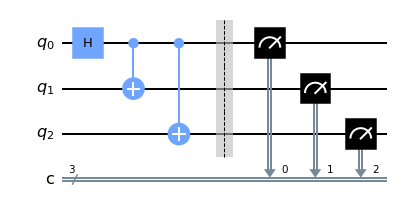

In [70]:
## new circuit
qc=newCircuit()

# Create a new Quantum Circuit
measr = QuantumCircuit(3, 3)

measr.barrier(range(3))  ## adding logical barrier

# map the quantum measurement to the classical bits
measr.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the measr has to be first and front=True (putting it before) as compose must put a smaller circuit into a larger one.
qc = measr.compose(qc, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

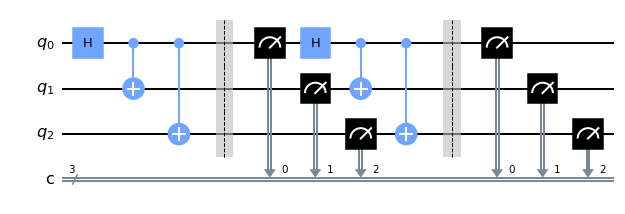

In [71]:
## Anther way of Combining 2 circuits
qc2 = qc + qc 
qc2.draw('mpl')

##### Quasm Simulator
To simulate this circuit, we use the qasm_simulator in Qiskit Aer.  
Each run of this circuit will yield bitstring denoting the occured quantum state.  

In [72]:


# Adding the transpiler to reduce the circuit to QASM instructions supported by the backend
from qiskit import transpile

# Use Aer's qasm_simulator
from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()

# First we have to transpile the quantum circuit to the low-level QASM instructions used by the backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator 1024 times.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

Frequency of each result is accounted to get its probability

In [73]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'111': 529, '000': 495}


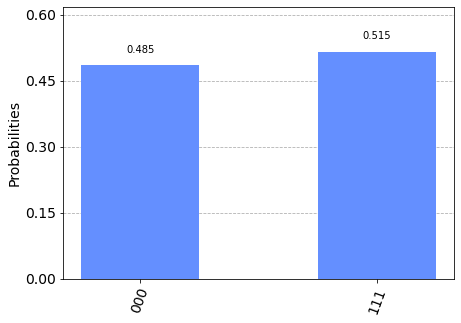

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Which means approximately 50% of the time we get |000⟩ state and 50% of the time |111⟩

###### visualizing multiple experiments

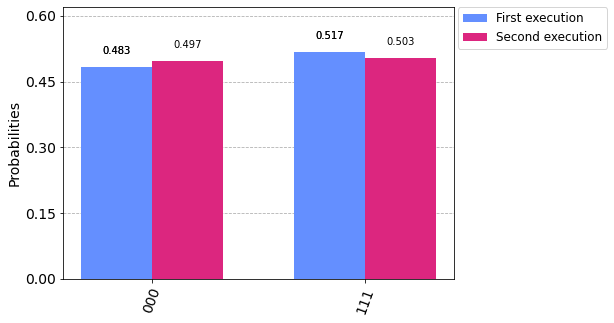

In [74]:
## Execute the circuit for second time
job2_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the second job.
result2_sim = job2_sim.result()
## counts of second job
second_counts = result2_sim.get_counts(qc_compiled) 

legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)
